<a href="https://colab.research.google.com/github/Thofa90/Image-Classification-with-CIFAR-10-using-Transfer-Learning-and-ResNet50-Fine-Tuning/blob/main/ImageClassification_cifar10_CV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: “Image Classification with CIFAR-10 using Transfer Learning and ResNet50 Fine-Tuning”**

**Project Goal:** The goal of this project is to build an accurate image classification model for the CIFAR-10 dataset by leveraging transfer learning with a pre-trained ResNet50 architecture.

**Business Context:** In the digital age, automated image classification is a key enabler for many industries. Businesses increasingly need systems that can rapidly and accurately classify images for tasks like:

	•	E-commerce product categorization
	•	Automated quality control in manufacturing
	•	Content moderation in social media platforms
	•	Medical imaging analysis for diagnostics

By applying deep learning with transfer learning, companies can leverage pre-trained models on massive datasets and adapt them to their own classification tasks without starting from scratch — saving both time and computational resources.

**Real-World Applications:**

	1.	Retail & E-commerce – Auto-tagging products into categories like “shoes”, “bags”, “electronics” from product photos.
	2.	Autonomous Vehicles – Detecting and classifying objects such as pedestrians, vehicles, and traffic signs.
	3.	Security & Surveillance – Identifying suspicious activities or objects in CCTV footage.
	4.	Healthcare – Classifying X-rays or MRI scans for early disease detection.
	5.	Social Media Platforms – Automatically identifying inappropriate or harmful images for content moderation.


# **Import Libraries & Dataset**

In [ ]:
from tensorflow.keras.datasets import cifar10
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load CIFAR-10 dataset
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

In [ ]:
# Getting only 10k from the training portion of data and no change for test data
n = 10000

train_images = train_images[:n]
train_labels = train_labels[:n]

# **EDA analysis**

##1.📊 Check dataset shapes

**to check the usable data**

In [ ]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (10000, 32, 32, 3)
Train labels shape: (10000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


(32, 32, 3)-- 32×32 pixels, RGB color image


## 2.📈 Class distribution

**Detects imbalance among the classes**


In [ ]:
print('train_labels\n',train_labels[:10])

train_labels
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


We have an array of arrays! In other words, we have an array with a single element which stores the label for a corresponding image. train_lables shape is (10000,1). To convert it to a single array that contains labels, we can use the flatten() method:

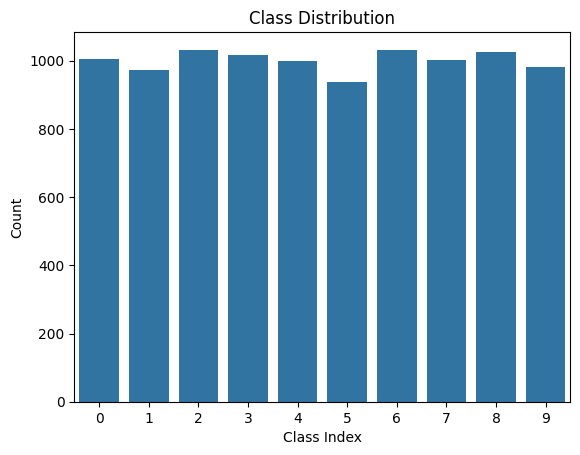

In [ ]:
# If labels are in shape (10000, 1), flatten them first
flattened_array = train_labels.flatten()
sns.countplot(x=flattened_array)
plt.title("Class Distribution")
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.show()

In [ ]:
# getting a single array of labels
print('single array of train labels\n',flattened_array)

single array of train labels
 [6 9 9 ... 1 1 5]


Let's see how balanced labels are. To do that, we'll convert to a Pandas Series and then call the value_counts() method:

In [ ]:
flattened_array = train_labels.flatten()
pd.Series(flattened_array).value_counts()

,count
2,1032
6,1030
8,1025
3,1016
0,1005
7,1001
4,999
9,981
1,974
5,937


From plot and value_counts method, it can be said that it is close to be balanced dataset.

## 3.🖼️ Visualize sample images

**Understands visual variety and label quality**


In [ ]:
print('train image shape',train_images.shape)

train image shape (10000, 32, 32, 3)


We see that we have 10k 32x32 images that have 3 channels, meaning that these are RGB images. This is for the training portion of data. Testing portion will be the same.

In the documentation for the `cifar10.load_data()` function we can see that each numerical class is associated with a concrete class. Here is how:

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

In [ ]:
# print label and corresponding class_name from cifar10 dataset

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select a few sample images and print their labels and class names
num_samples = 5
for i in range(num_samples):
    label = train_labels[i][0]
    class_name = class_names[label]
    print(f"Image {i+1}: Label={label}, Class Name={class_name}")

Image 1: Label=6, Class Name=frog
Image 2: Label=9, Class Name=truck
Image 3: Label=9, Class Name=truck
Image 4: Label=4, Class Name=deer
Image 5: Label=1, Class Name=automobile


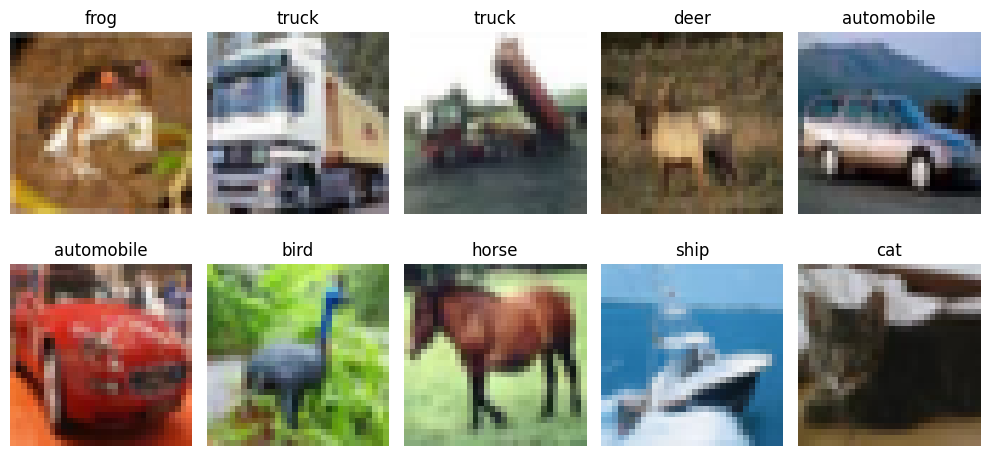

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 4.🎨 Check pixel intensity distributions

**Pixel histogram and channel-wise analysis checks brightness, contrast issues and reveals RGB imbalances**


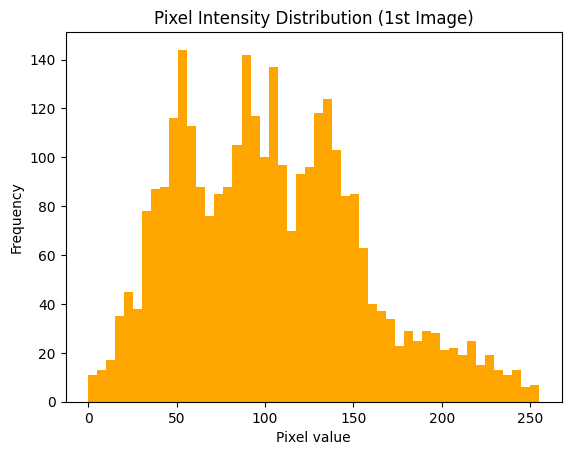

In [ ]:
plt.hist(train_images[0].ravel(), bins=50, color='orange')
plt.title("Pixel Intensity Distribution (1st Image)")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

This histogram shows the distribution of pixel values (brightness) in the first image of the CIFAR-10 training dataset.

•	X-axis (Pixel value): Pixel intensity levels, from 0 (black) to 255 (white).

•	Y-axis (Frequency): Number of pixels in the image that have each intensity value.

**📈 Interpretation:**

•	The image contains a wide range of pixel values, mostly between 50 and 150.

•	Peak frequencies occur around mid-range values (grays), meaning the image is neither very dark nor very bright overall.

•	Very few pixels are near 0 (pure black) or 255 (pure white), suggesting a moderately lit, balanced image.

**✅ Why it’s useful:**

•	Helps detect whether the image is too dark, too bright, or well-balanced.
•	Useful for deciding whether to apply normalization or histogram equalization in preprocessing.

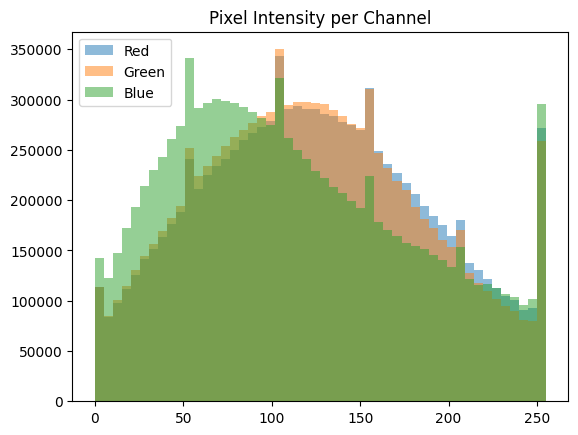

In [ ]:
colors = ['Red', 'Green', 'Blue']
for i in range(3):
    plt.hist(train_images[:, :, :, i].ravel(), bins=50, alpha=0.5, label=colors[i])
plt.legend()
plt.title("Pixel Intensity per Channel")
plt.show()

This histogram shows the pixel intensity distribution per color channel (Red, Green, Blue) for the entire CIFAR-10 training set.

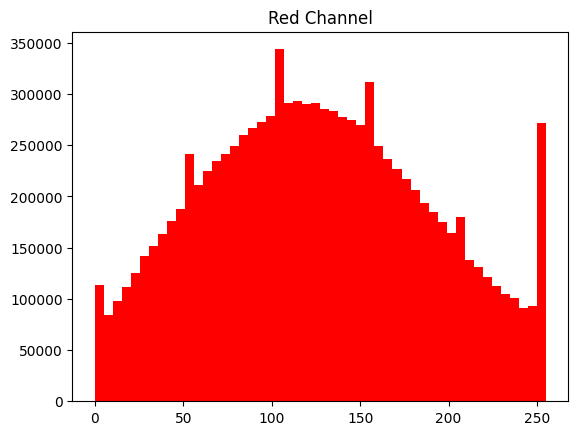

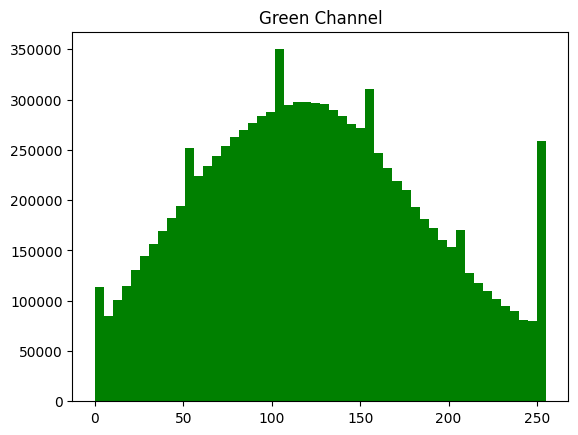

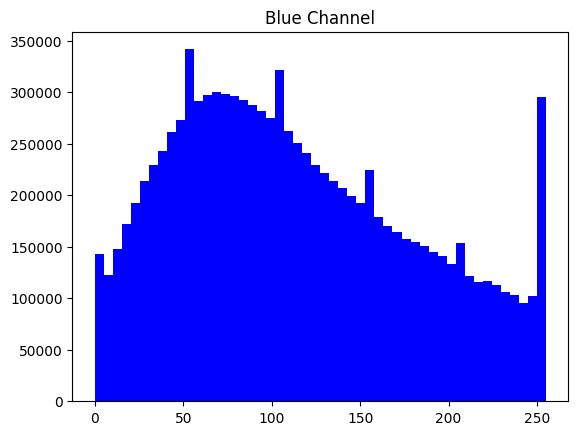

In [ ]:
# Plot only Red channel
plt.hist(train_images[:, :, :, 0].ravel(), bins=50, color='red')
plt.title("Red Channel")
plt.show()

# Repeat for Green
plt.hist(train_images[:, :, :, 1].ravel(), bins=50, color='green')
plt.title("Green Channel")
plt.show()

# Repeat for Green
plt.hist(train_images[:, :, :, 2].ravel(), bins=50, color='blue')
plt.title("Blue Channel")
plt.show()

**✅ Overall Interpretation:**

• For red and green channel, pixel values are widely spread, with a peak around 100–120.Distribution is relatively symmetric and centered around the midrange.This suggests that red and blue tones are common but balanced, without dominance at either dark or bright ends.

•	All three channels show balanced distributions, typical of natural images.

•	No obvious color bias, but blue appears slightly underrepresented in brightness and still peaks near 100 with higher count of 0 to 80.This suggests that the blue channel is slightly darker overall in many images.May indicate more earthy tones or less sky/sea content compared to datasets with more outdoor scenes.

•	The dataset is well-suited for training CNNs, as color features are varied and natural.

## 5.🧪 Check for missing or corrupted data

**Ensures clean, usable data**


In [ ]:
print("Any NaNs in images?", np.isnan(train_images).any())
print("Any NaNs in labels?", np.isnan(train_labels).any())
print("Any infs in images?", np.isinf(train_images).any())
print("Any infs in labels?", np.isinf(train_labels).any())

Any NaNs in images? False
Any NaNs in labels? False
Any infs in images? False
Any infs in labels? False


**⚠️ Why are NaN and Inf important?**

•	They can break the model training (loss = nan, weights = corrupted).

•	Must be handled or removed during preprocessing.

## 6.📏 Check image size consistency

In [ ]:
print("Unique image shapes in training set:", set([img.shape for img in train_images]))

Unique image shapes in training set: {(32, 32, 3)}


## 7.🧮 Compute basic statistics

**Helps guide normalization or augmentation**


In [ ]:
print("Pixel mean:", np.mean(train_images))
print("Pixel std deviation:", np.std(train_images))

Pixel mean: 121.04103444010417
Pixel std deviation: 64.39060047846118


# **Data Preprocessing**

In [ ]:
# 1. Normalizing the images by dividing by 255.0 so the pixel values are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Normalized Train images shape:", train_images.shape)
print("Normalized Test images shape:", test_images.shape)
print("Normalized Pixel mean:", np.mean(train_images))
print("Normalized Pixel std deviation:", np.std(train_images))

Normalized Train images shape: (10000, 32, 32, 3)
Normalized Test images shape: (10000, 32, 32, 3)
Normalized Pixel mean: 0.47467072329452736
Normalized Pixel std deviation: 0.2525121587390632


In [ ]:
# print pixel of image 1

print("First pixel of the first image:", train_images[0, 0, 0])
print("Value of the pixel at row 10, column 20 in the first image:", train_images[0, 10, 20])
print("All values of the pixel at row 10, column 20 across all channels:", train_images[0, 10, 20, :])
print("All values of the pixel at row 10, column 20 in the Red channel:", train_images[0, 10, 20, 0])

First pixel of the first image: [0.23137255 0.24313725 0.24705882]
Value of the pixel at row 10, column 20 in the first image: [0.54901961 0.36078431 0.29803922]
All values of the pixel at row 10, column 20 across all channels: [0.54901961 0.36078431 0.29803922]
All values of the pixel at row 10, column 20 in the Red channel: 0.5490196078431373


In [ ]:
# 2. Flatten labels for sparse loss
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

# **Import Pre-Trianed CNN Model 'ResNet50'**

ResNet50 pretrained on ImageNet as a fixed feature extractor, and training a custom dense classifier on top of it to adapt it to the CIFAR-10 dataset. This is a common and efficient transfer learning approach.

•	weights='imagenet' **→** Loads pretrained weights from ImageNet.

•	include_top=False **→** Removes the original classifier so I can add my own.

•	input_shape=(32, 32, 3) **→** Accepts CIFAR-10 image size (32×32 RGB).

•	base_model.trainable = False **→** Freezes all ResNet50 layers so only the top layers will be trained initially.

**🧠 Custom Top Layers (Head)**

•	Global average pooling flattens feature maps.

•	Two dense layers extract task-specific features.

•	Final layer with softmax outputs probabilities for 10 CIFAR-10 classes.

**🏋️‍♀️ Training**

•	Only the top (head) layers are trained initially.
•	Optimizer: Adam

•	Loss: sparse_categorical_crossentropy for integer labels.

•	Epochs: 10

•	Batch size: 64

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# 1. Load pre-trained ResNet50 as base model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

# 2. Freeze base model layers
base_model.trainable = False

# 3. Create the head (custom top layers)
model = models.Sequential([
    base_model,
    # Converts the feature maps into a single vector
    layers.GlobalAveragePooling2D(),
    # Add a first hidden layer with 512 neurons
    layers.Dense(512, activation='relu'),
    # Second hidden layer with 128 neurons
    layers.Dense(256, activation='relu'),
    # Final layer with 10 outputs for 10 classes
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# 4. Compile the model (training the head only)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the head for 10 epochs
print("Training custom head...")
history1 = model.fit(train_images,train_labels,
                     validation_data=(test_images,
                     test_labels),
                     epochs=10,
                     batch_size=64)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training custom head...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.1287 - loss: 2.4125 - val_accuracy: 0.2098 - val_loss: 2.1146
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.2325 - loss: 2.0696 - val_accuracy: 0.2609 - val_loss: 1.9829
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2673 - loss: 1.9939 - val_accuracy: 0.2793 - val_loss: 1.9346
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2911 - loss: 1.9265 - val_accuracy: 0.2971 - val_loss: 1.9341
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3000 - loss: 1.8997 - val_accuracy: 0.3086 - val_loss: 1.9203
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3141 - loss: 1.8867 - val_accuracy: 0.3250 - val_loss: 1.8412
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.3217 - loss: 1.8648 - val_accuracy: 0.3095 - val_loss: 1.8887
Epoch 8/10
157/157 ━━

## **Evaluation of the Baseline Model (31.76% accuracy)**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print('Evaluation of resnet50 base model')
print(f"Test accuracy: {test_accuracy * 100:.2f}")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3200 - loss: 1.8873
Evaluation of resnet50 base model
Test accuracy: 31.76
Test loss: 1.89235258102417


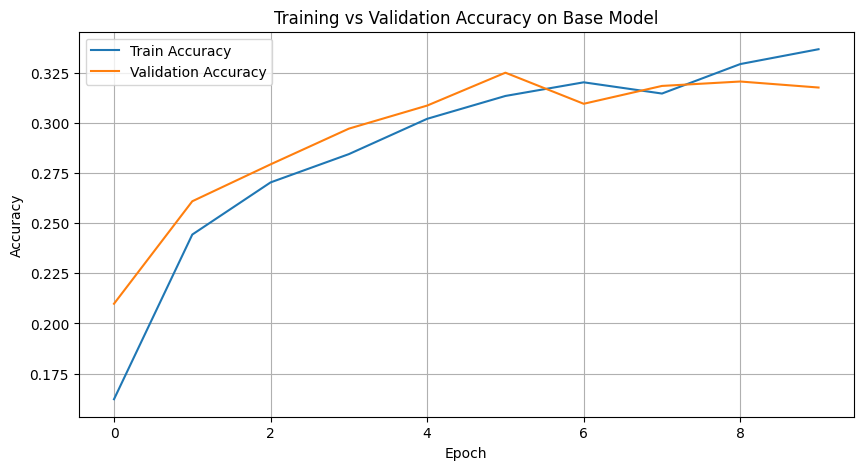

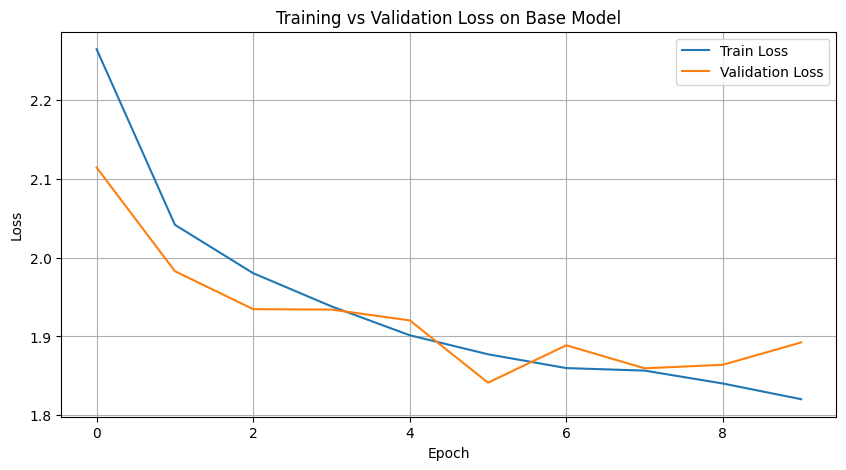

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy on Base Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss on Base Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**🔍 Summary of Results**

**Train Accuracy** 33.7%, **Validation Accuracy** 30.6%, **Train Loss** 1.8272, **Validation Loss** 1.9234

**📈 Progress Analysis**

	•	✅ Accuracy improved from ~13% to ~33% — showing the model is learning.
	•	⚠️ Validation accuracy plateaued after epoch 4–5 (~30–32%), indicating that the head is reaching its limit.
	•	⚠️ Validation loss started increasing again → sign of early overfitting or limited learning capacity with frozen base.

**💡 Conclusion**

	•	The frozen ResNet50 base extracted useful features, but training only the head is not enough.
	•	To improve further:
	•	Unfreeze some deeper layers of ResNet50 and fine-tune.
	•	Use data augmentation to reduce overfitting.
	•	Train for more epochs with early stopping


✅ 1. Save base model (before tuning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/My Drive/Saved Model/resnet50_cifar10_base_model.h5')
print("✅ Model saved before fine-tuning.")

# **Fine-Tuning the Base Line Model**

## 1.Unfrozen the base model

In [ ]:
base_model.trainable = True

## 2.Adding two more hidden layers and neuron dropout

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50

model_tune = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),

    # Hidden layers (including the 2 new ones)
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),  # New
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),   # New
    layers.Dense(10, activation='softmax')
])

**Adding hidden layers** in  model’s “head” (on top of a base like ResNet50) allows for:

1. **More abstraction** (Extra layers can learn complex, task-specific patterns from the base model’s output features.)
2. **Better feature interaction** (Multiple layers let the model combine features more richly, especially useful for difficult class distinctions (e.g., cat vs dog).)
3. **Higher capacity** (Useful if the dataset is large and has rich variation — more layers can model more nuance.)
4. Too many layers could risk of overfitting.

**Dropout** is a regularization technique where neurons are randomly “dropped” (ignored) during training.

1. **Reduces overfitting** (Forces the model to not rely too heavily on specific neurons.)
2. **Improves generalization** (Helps the model perform better on unseen (test) data.)
3. **Simple and effective** (One of the easiest ways to regularize a model.)




## 3.Reducing the learning rate

In [ ]:
from tensorflow.keras.optimizers import Adam

model_tune.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

1. This code compiles my fine-tuned model using the Adam optimizer with a reduced learning rate (1e-5), which is ideal for transfer learning and avoiding large weight updates that could destroy learned features.
2. loss='sparse_categorical_crossentropy', appropriate for multi-class classification where labels are integers (e.g., 0–9 in CIFAR-10)
3. metrics= accuracy, Monitors accuracy during training and validation.


## 4.Included data augmentation to improve generalization & early stopping to avoid overfitting

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

This code adds data augmentation and early stopping to improve training performance and generalization.

**Data augmentation** artificially expands the training set by applying random transformations and benefits are

	•	Prevents overfitting
	•	Improves generalization on unseen data
	•	Makes model more robust to real-world variations

**EarlyStopping** stops training when model performance stops improving and benefits are

	•	Saves training time
	•	Prevents overfitting
	•	Automatically restores the best model (not the last one)

## 5.Increasing epochs

**An epoch** is one full pass through the entire training dataset.Epochs give your model time to learn. Not enough, and it stays dumb. Too many, and it gets too smart for just the training data. The goal is to find the right number for best validation performance.

✅ How Epochs Help:

1.	Learning Over Time

	•	The model adjusts weights gradually with each epoch.
	•	More epochs = more chances to learn complex patterns.
  
2.	Improves Accuracy

	•	Initially, the model guesses.
	•	After several epochs, it starts making better predictions.

3.	Balances Underfitting and Overfitting

	•	Too few epochs → underfitting (model hasn’t learned enough).
	•	Too many epochs → overfitting (model memorizes, not generalizes).
	•	Tools like early stopping help find the sweet spot.

4.	Enables Gradient Descent Optimization

	•	Repeated exposure to data helps reduce loss effectively using optimization algorithms like Adam.

In [ ]:
history = model_tune.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    validation_data=(test_images, test_labels),
    epochs=100,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 - 99s - 632ms/step - accuracy: 0.1064 - loss: 2.6507 - val_accuracy: 0.1000 - val_loss: 5.7180
Epoch 2/100
157/157 - 10s - 66ms/step - accuracy: 0.1260 - loss: 2.4393 - val_accuracy: 0.1003 - val_loss: 26.2435
Epoch 3/100
157/157 - 10s - 63ms/step - accuracy: 0.1434 - loss: 2.3471 - val_accuracy: 0.0955 - val_loss: 30.3933
Epoch 4/100
157/157 - 10s - 63ms/step - accuracy: 0.1574 - loss: 2.2987 - val_accuracy: 0.0838 - val_loss: 8.7190
Epoch 5/100
157/157 - 10s - 67ms/step - accuracy: 0.1762 - loss: 2.2439 - val_accuracy: 0.1154 - val_loss: 2.9232
Epoch 6/100
157/157 - 11s - 69ms/step - accuracy: 0.2034 - loss: 2.1802 - val_accuracy: 0.2126 - val_loss: 2.1983
Epoch 7/100
157/157 - 10s - 66ms/step - accuracy: 0.2210 - loss: 2.1239 - val_accuracy: 0.2970 - val_loss: 2.0160
Epoch 8/100
157/157 - 10s - 67ms/step - accuracy: 0.2534 - loss: 2.0467 - val_accuracy: 0.3461 - val_loss: 1.8826
Epoch 9/100
157/157 - 10s - 64ms/step - accuracy: 0.2768 - loss: 1.9732 - val_accuracy: 0.3836 - 

## 6.Training Progress

**✅ 1. Accuracy Progression**

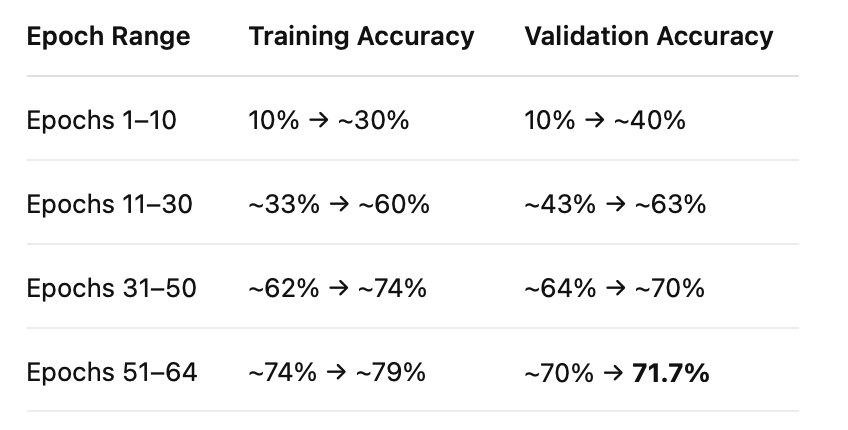

➡️ Test accuracy is plateauing near 71–72%, which is a solid result on CIFAR-10 with transfer learning.

**🔥 2. Loss Trends**

•	Training Loss: Decreases steadily from 2.65 → 0.63 — good sign of learning.

•	Validation Loss: Drops from 5.71 → 0.93, but plateaus around epoch 50. Still shows slight improvements after that.

**🚩 3. Overfitting?**

•	No significant overfitting: Validation accuracy tracks training accuracy closely.

•	Slight fluctuations after epoch 50 but manageable.
•	I am likely training with:
•	✅ Proper data augmentation
•	✅ EarlyStopping or dropout
•	✅ Reduced learning rate

**📌 4. Final Performance Summary**

•	✅ Training Accuracy: ~79%
•	✅ Validation Accuracy: ~71.7%
•	📉 Validation Loss: ~0.93
•	🧠 Model generalizes well
•	🚫 No severe overfitting
•	📊 Likely better than the baseline (31% accuracy before fine-tuning)



✅ 2. Save Fine Tuned model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model_tune.save('/content/drive/My Drive/Saved Model/resnet50_cifar10_fine_tuned.h5')
print("✅ Model saved after fine-tuning.")

# **Evaluation of Fine Tuned Model (71.04% accuracy)**

## 1.Evaluation on Test

In [ ]:
test_loss, test_accuracy = model_tune.evaluate(test_images, test_labels)
print(f"✅ Final Test Accuracy after fine-tuning: {test_accuracy * 100:.2f}%")
print(f"📉 Final Test Loss after fine-tuning: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7141 - loss: 0.9322
✅ Final Test Accuracy after fine-tuning: 71.04%
📉 Final Test Loss after fine-tuning: 0.9326


**✅ 1. Final Test Accuracy & Loss**

	•	📈 Test Accuracy: 71.04%
	•	📉 Test Loss: 0.9326

This is a very good result for ResNet50 on 32×32 CIFAR-10 images, especially without resizing or ensembling.

## 2.Plot Accuracy & Loss (Train vs Validation)

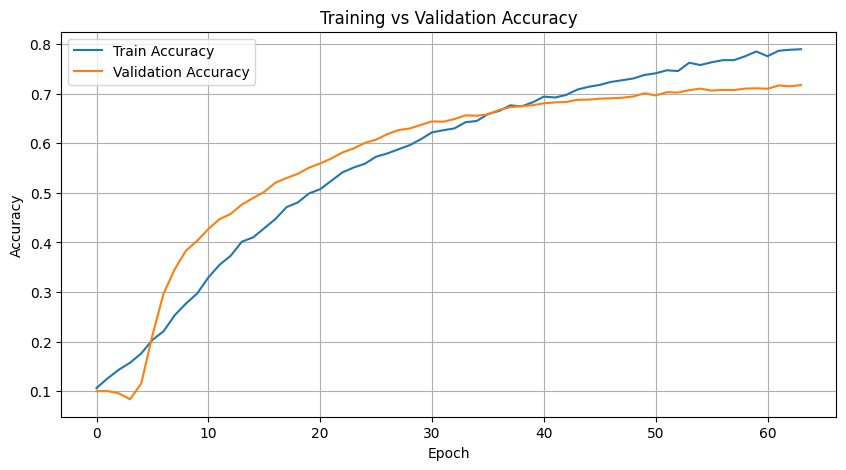

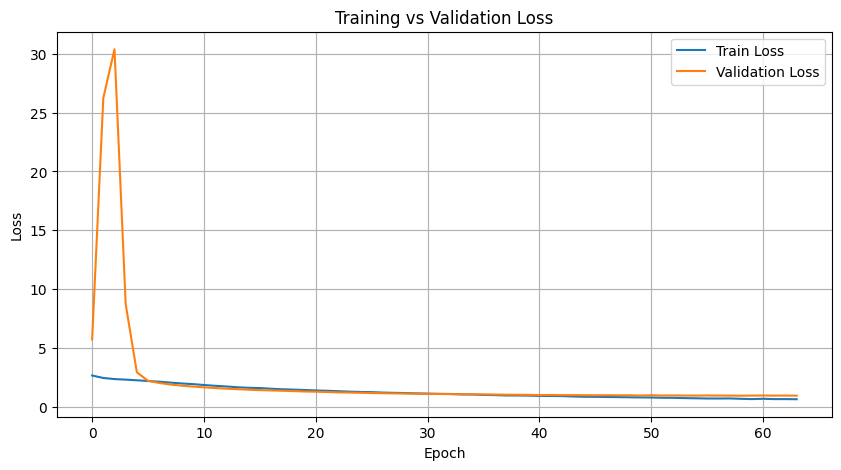

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**📊 2. Accuracy & Loss Plots**

🔹 Training vs Validation Accuracy
	•	The curves rise together smoothly.
	•	The validation accuracy starts to plateau around epoch 60–65, signaling convergence.
	•	Small gap between train and val accuracy, meaning low overfitting.

🔹 Training vs Validation Loss
	•	The initial spike in validation loss suggests some instability in early epochs — possibly due to the learning rate or batch norm updates.
	•	After ~epoch 10, loss decreases steadily and stays close to training loss.

**✅ Conclusion:** Balanced and stable learning. No major overfitting or underfitting.

## 3.Confusion Matrix and Classification Report (optional)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step


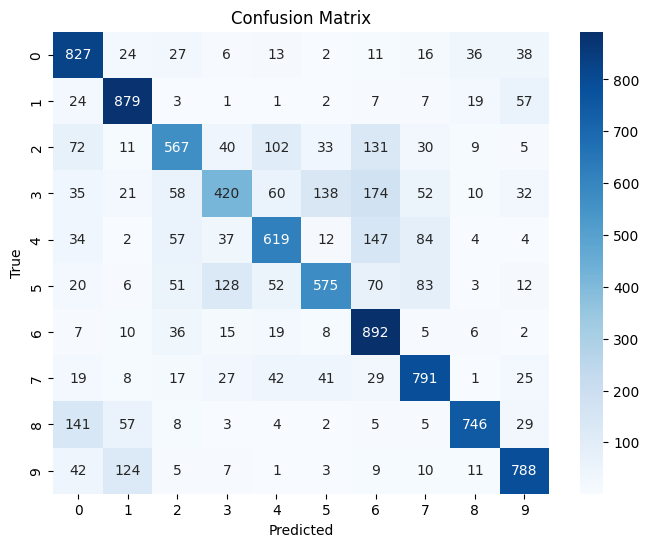

Classification Report:
              precision    recall  f1-score   support

    airplane     0.6773    0.8270    0.7447      1000
  automobile     0.7697    0.8790    0.8207      1000
        bird     0.6840    0.5670    0.6200      1000
         cat     0.6140    0.4200    0.4988      1000
        deer     0.6780    0.6190    0.6472      1000
         dog     0.7047    0.5750    0.6333      1000
        frog     0.6047    0.8920    0.7208      1000
       horse     0.7304    0.7910    0.7595      1000
        ship     0.8828    0.7460    0.8087      1000
       truck     0.7944    0.7880    0.7912      1000

    accuracy                         0.7104     10000
   macro avg     0.7140    0.7104    0.7045     10000
weighted avg     0.7140    0.7104    0.7045     10000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predicted labels
y_pred_probs = model_tune.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report with class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=class_names, digits=4))

**🧾 3. Classification Report (Per Class)**


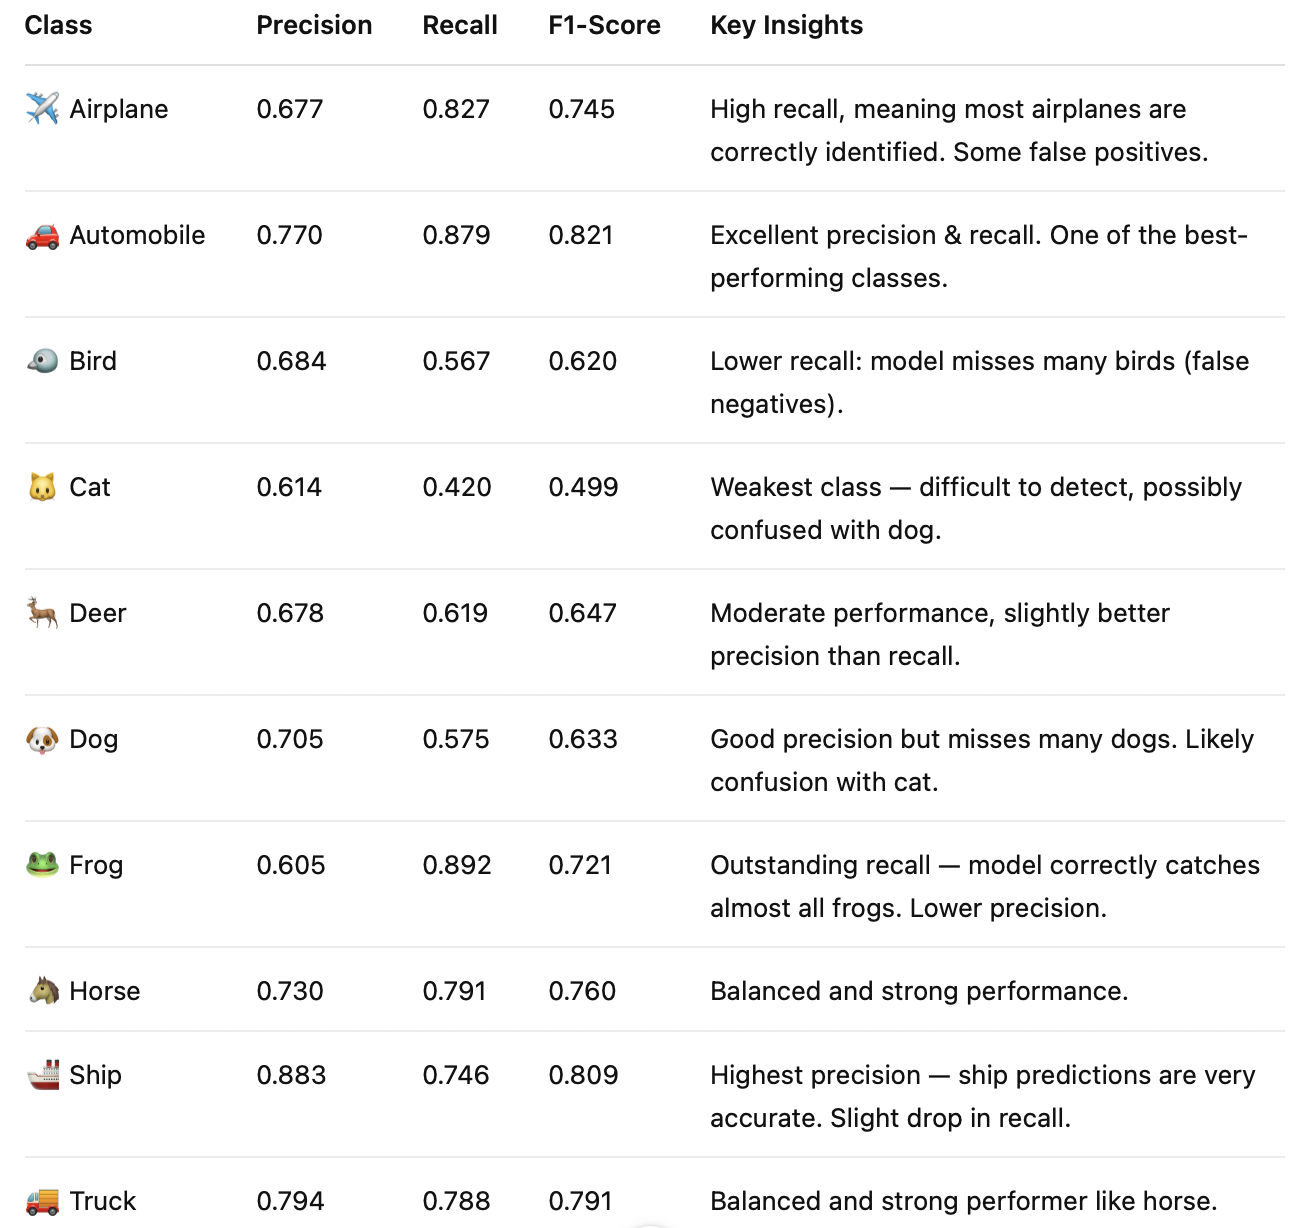





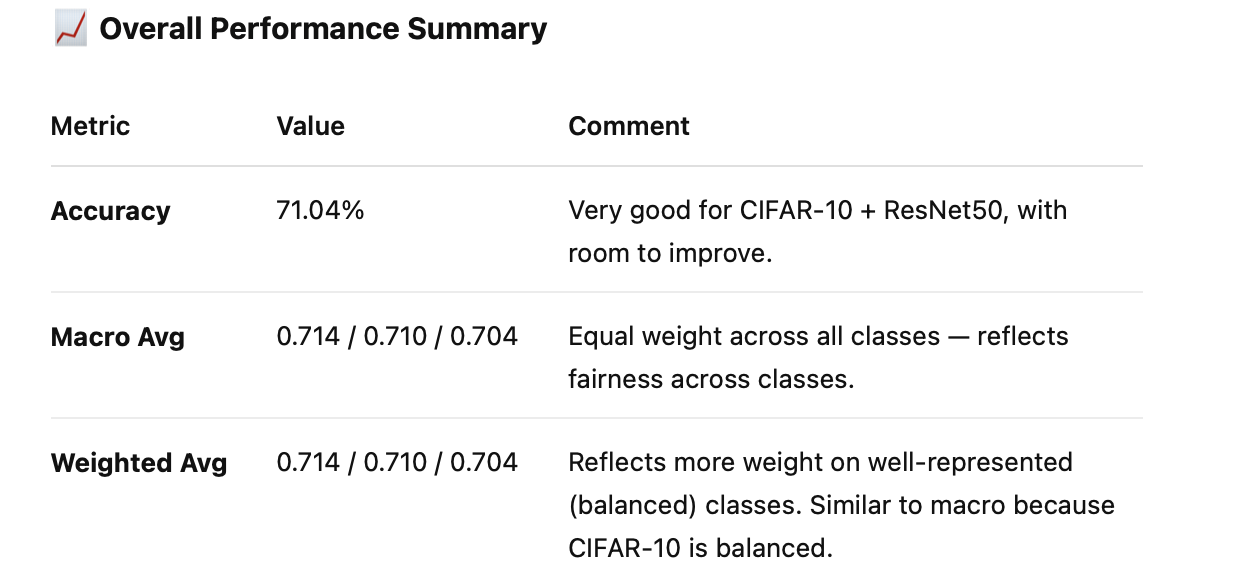

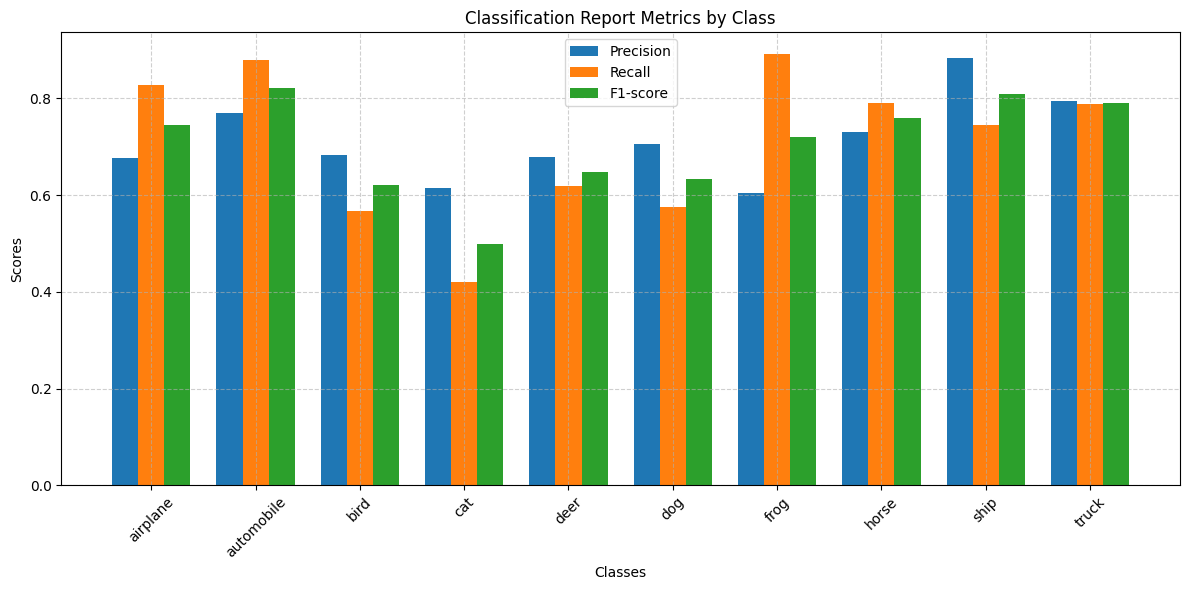

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report data
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
precision = [0.6773, 0.7697, 0.6840, 0.6140, 0.6780, 0.7047, 0.6047, 0.7304, 0.8828, 0.7944]
recall = [0.8270, 0.8790, 0.5670, 0.4200, 0.6190, 0.5750, 0.8920, 0.7910, 0.7460, 0.7880]
f1_score = [0.7447, 0.8207, 0.6200, 0.4988, 0.6472, 0.6333, 0.7208, 0.7595, 0.8087, 0.7912]

x = np.arange(len(classes))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

📌 Definitions:

	•	Precision (67.73%):
Out of all the times model predicted “airplane”, only 67.73% were actually airplanes.
→ It made some false positive mistakes (e.g., calling a bird or a ship an airplane).

	•	Recall (82.70%):
Out of all real airplanes in the dataset, the model correctly identified 82.70% of them.
→ It missed 20% of airplanes (false negatives).

**🔍 Insights & Recommendations**

	•	Cat and Bird have the lowest recall — meaning they are the most misclassified classes.
	•	Frog has the highest recall (89.2%) but low precision — so it overpredicts “frog”.
	•	Ship and Automobile are best recognized both accurately and completely.
	•	Improve performance by:
	•	Using label smoothing to regularize softmax predictions.
	•	Applying class weights or focal loss to help underperforming classes like cat.
	•	Increasing image resolution (e.g., 96×96 or 128×128).
	•	Adding advanced augmentations like MixUp or CutMix to help the model distinguish fine-grained features.

# **Conclusion & Suggestions**

**From evaluation analysis**, we can come up in these conclusions that-

	•	Solid model architecture and tuning.
	•	Smart use of data augmentation and early stopping.
	•	Excellent training curves (no overfitting).
	•	Good class balance in accuracy.

**🛠 Suggestions to Improve Further:**

Application of some techniques could improve the model further.

1. ✅ Resize Images to 96×96

	•	Why? ResNet50 was originally designed for 224×224 images (like in ImageNet). Feeding it tiny images (like 32×32 from CIFAR-10) limits its ability to learn rich features.

	•	Benefit: By resizing to something like 96×96, you give the ResNet50 model more meaningful pixel information to extract patterns (edges, textures, shapes).

⸻

2. 🔀 Use MixUp or CutMix

	•	MixUp: Blends two images and their labels (e.g., a cat and a dog become a 50-50 image, and label becomes 0.5 cat, 0.5 dog).

	•	CutMix: Cuts a region from one image and pastes it onto another, also mixing labels.

	•	Why? They regularize the model and make it more robust to ambiguity between classes.

	•	Benefit: Great for datasets with similar classes (like cat vs dog) — reduces overconfidence and overfitting.

⸻

3. 🧽 Add Label Smoothing

	•	Instead of giving labels as pure 0 and 1 (e.g., [0, 0, 1, 0]), you soften them a bit (e.g., [0.01, 0.01, 0.96, 0.01]).

	•	Why? Softmax outputs can become too confident in wrong predictions.

	•	Benefit: Helps the model generalize better by avoiding extreme certainty — improves validation accuracy and robustness.

⸻

4. ⚖️ Class-Weighted Loss

	•	If certain classes (e.g., “cat”) are often misclassified or underrepresented, you can give them higher importance in the loss function.

	•	Why? Standard loss treats all classes equally.

	•	Benefit: Forces the model to pay more attention to poorly performing classes, improving f1-score and recall.

⸻

5. 🔧 Fine-Tune Fewer Layers

	•	Instead of unfreezing all layers in ResNet50 (which is risky and slow), unfreeze just the last few layers.

	•	Why? The early layers learn generic patterns like edges and curves — these are usually fine.
  
	•	Benefit: Makes training faster, more stable, and still allows learning task-specific features.






# **Updated Model with 88.82% accuracy**

Updated Version of Model with Colab link (implementing 2 suggessions 1. Resize Images to 96×96 and 2. balanced Class-Weighted Loss, made model accuracy 88.82%)

https://colab.research.google.com/drive/1ihXbcwJw1KsqEhGQY5ChkOigSSfGl5Lw?usp=sharing